In [ ]:
import os
os.chdir('/het/p4/ramirez/gcewavelets/skysearch/code/')

In [1]:
from __future__ import print_function, division
import os

from IPython import display
import sys
import importlib
import time
from tqdm import tqdm


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors

rcParams.update({'figure.autolayout': True})
#plt.rc('font', family='serif')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rc('axes',edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

/var/folders/gb/n0lc139d4r934t89f3vd8qjc0000gn/T/ipykernel_13629/1828583229.py:33: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


In [2]:
import fermipy
from fermipy.utils import make_psf_kernel

In [3]:
import fermipy.irfs as irfs

In [4]:
import pyIrfLoader

In [5]:
irf_factory = pyIrfLoader.IrfsFactory.instance()

In [6]:
event_class = 'P8R3_CLEAN_V3'
event_type = 'FRONT'

In [7]:
irfname = '%s::%s' % (event_class, event_type)

In [8]:
irf = irf_factory.create(irfname)

In [9]:
irf = irfs.create_irf(event_class, event_type)

In [10]:
np.degrees(np.arccos(0))

90.0

In [11]:
irf.psf().value(0.0,1000,0.0,0.0)

9686.767854322405

In [12]:
elist = np.logspace(2,4,100)
psf_list = []

for e in elist:
    psf_list.append(irf.psf().value(0.0,e,0.0,0.0))
psf_list = np.asarray(psf_list)

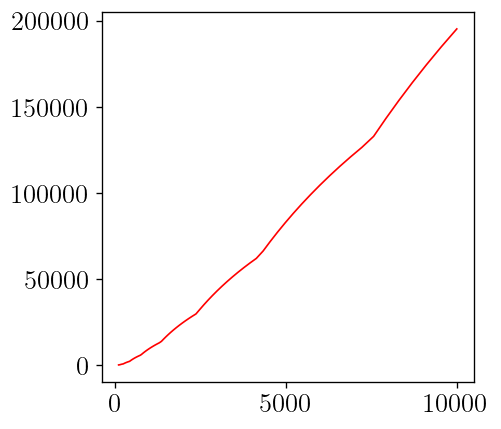

In [13]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)
ax.plot(elist,psf_list,lw=1,c='r')

In [14]:
dtheta_list = np.linspace(0,10,100)
psf_list_1000 = []
psf_list_100 = []

for dth in dtheta_list:
    psf_list_100.append(irf.psf().value(dth,100,0.0,0.0))
psf_list_100 = np.asarray(psf_list_100)

for dth in dtheta_list:
    psf_list_1000.append(irf.psf().value(dth,1000,0.0,0.0))
psf_list_1000 = np.asarray(psf_list_1000)

Text(0, 0.5, 'psf (a.u.)')

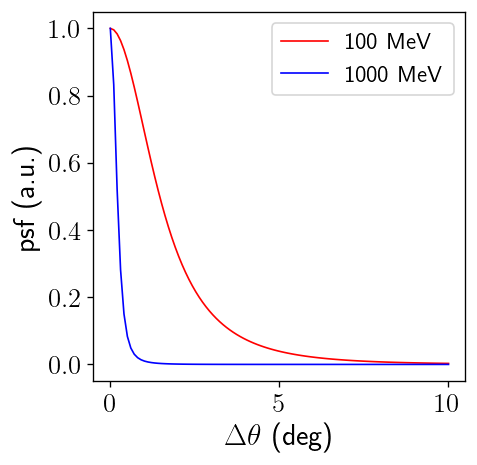

In [15]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)
ax.plot(dtheta_list,psf_list_100/psf_list_100.max(),lw=1,c='r',label='100 MeV')
ax.plot(dtheta_list,psf_list_1000/psf_list_1000.max(),lw=1,c='b',label='1000 MeV')

ax.legend()

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')

In [16]:
event_class = 'P8R3_ULTRACLEAN_V3'
event_type = 'FRONT'
irfname = '%s::%s' % (event_class, event_type)
irf = irfs.create_irf(event_class, event_type)

In [37]:
dtheta_list = np.linspace(0,10,1000)
psf_list_1000 = []
psf_list_100 = []

for dth in dtheta_list:
    psf_list_100.append(irf.psf().value(dth,100,0.0,0.0))
psf_list_100 = np.asarray(psf_list_100)

for dth in dtheta_list:
    psf_list_1000.append(irf.psf().value(dth,1000,0.0,0.0))
psf_list_1000 = np.asarray(psf_list_1000)

Text(0, 0.5, 'psf (a.u.)')

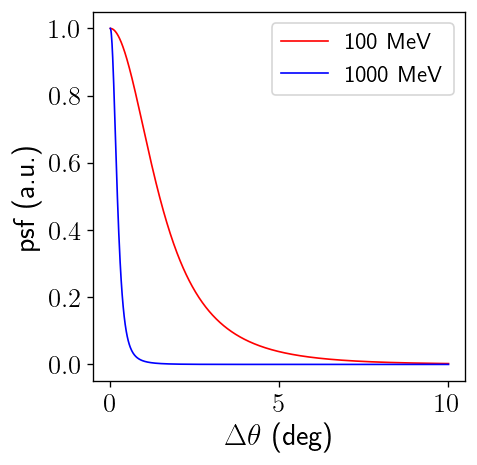

In [38]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)
ax.plot(dtheta_list,psf_list_100/psf_list_100.max(),lw=1,c='r',label='100 MeV')
ax.plot(dtheta_list,psf_list_1000/psf_list_1000.max(),lw=1,c='b',label='1000 MeV')

ax.legend()

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')

In [39]:
from scipy.optimize import curve_fit

In [88]:
def gaus(x, a, sigma):
    return a*np.exp(-x**2/(2*sigma**2))

In [41]:
popt, pcov = curve_fit(gaus, dtheta_list, psf_list_1000/psf_list_1000.max())

In [42]:
pcov

array([[ 7.78550444e-06, -1.06173271e-06],
       [-1.06173271e-06,  4.46915033e-07]])

(0.0, 1.0)

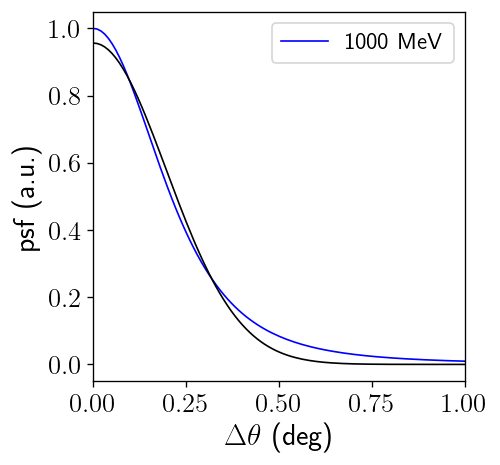

In [43]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)
#ax.plot(dtheta_list,psf_list_100/psf_list_100.max(),lw=1,c='r',label='100 MeV')
ax.plot(dtheta_list,psf_list_1000/psf_list_1000.max(),lw=1,c='b',label='1000 MeV')
ax.plot(dtheta_list,gaus(dtheta_list,popt[0],popt[1]),lw=1,c='k')

ax.legend()

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')
#ax.set_yscale('log')
#ax.set_ylim(1e-3,10)
ax.set_xlim(0,1)

In [161]:
energy_list = np.logspace(2,5,1000)
dtheta_list = np.logspace(-6,1,10000)
#dtheta_list = np.linspace(0,1,100000)
dtheta_list = np.concatenate([ [0],dtheta_list])

psf_array = np.zeros( (len(energy_list),len(dtheta_list)) )

for i,e in enumerate(energy_list):
    psf_list = []
    for dth in dtheta_list:
        psf_list.append(irf.psf().value(dth,e,0.0,0.0))
    psf_list = np.asarray(psf_list)
    
    psf_array[i] = psf_list

In [163]:
psf_sigma = []

for i,e in enumerate(energy_list):
    popt, pcov = curve_fit(gaus, dtheta_list, psf_array[i]/psf_array[i].max())
    psf_sigma.append(popt[1])
psf_sigma = np.asarray(psf_sigma)
psf_sigma = np.abs(psf_sigma)

In [164]:
def line_fit(x,a,b):
    return a+b*x

In [165]:
popt, pcov =  curve_fit(line_fit, np.log(energy_list), np.log(psf_sigma))

In [166]:
line_fit(2,popt[0],popt[1])

1.5737019562201189

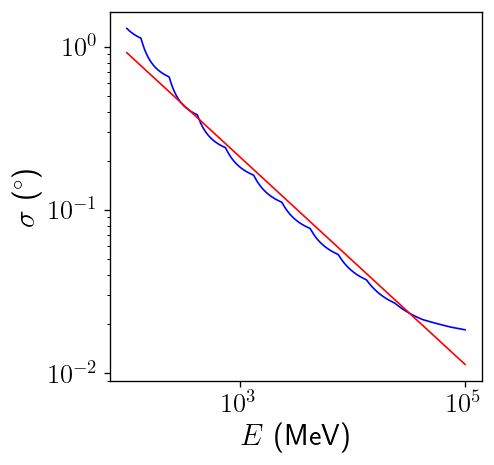

In [167]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)

ax.plot(energy_list,np.abs(psf_sigma),c='b',lw=1)
ax.plot(energy_list,np.exp(line_fit(np.log(energy_list),popt[0],popt[1])),c='r',lw=1)

ax.set_xlabel('$E$ (MeV)')
ax.set_ylabel('$\sigma$ ($^\circ$)')

ax.set_xscale('log')
ax.set_yscale('log')

(0.0, 0.2)

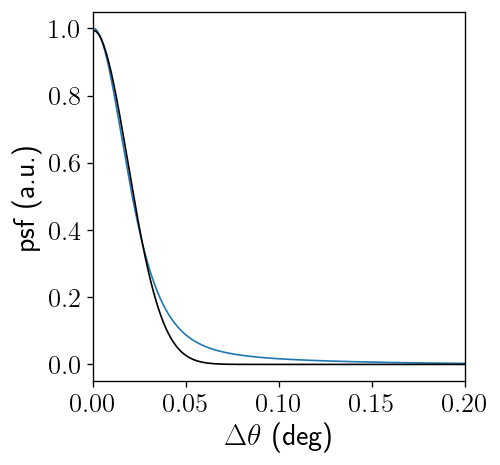

In [133]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)

#for i,e in enumerate(energy_list):
#    if i%10!=0:
#        continue
#    ax.plot(dtheta_list,psf_array[i]/psf_array[i].max(),lw=1,label=str(e))
ax.plot(dtheta_list,psf_array[99]/psf_array[99].max(),lw=1,label=str(e))
ax.plot(dtheta_list,gaus(dtheta_list,popt[0],popt[1]),lw=1,c='k')

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(1e-3,10)
ax.set_xlim(0,0.2)

In [134]:
from scipy.interpolate import interp1d

In [135]:
psf_test = interp1d(dtheta_list,psf_array[99]/psf_array[99].max())

(0.0, 0.2)

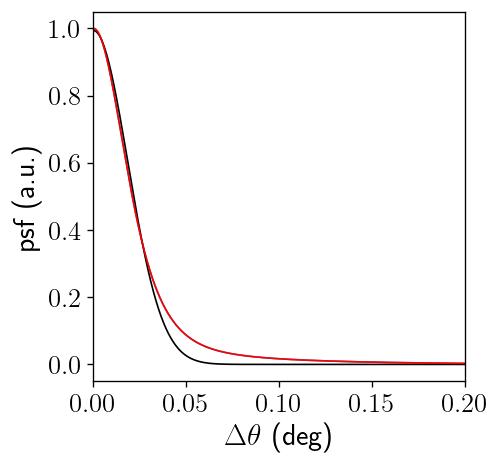

In [136]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)

#for i,e in enumerate(energy_list):
#    if i%10!=0:
#        continue
#    ax.plot(dtheta_list,psf_array[i]/psf_array[i].max(),lw=1,label=str(e))
ax.plot(dtheta_list,psf_array[99]/psf_array[99].max(),lw=1,label=str(e))
ax.plot(dtheta_list,gaus(dtheta_list,popt[0],popt[1]),lw=1,c='k')
ax.plot(dtheta_list,psf_test(dtheta_list),lw=1,c='r')

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(1e-3,10)
ax.set_xlim(0,0.2)

In [169]:
event_class = 'P8R3_ULTRACLEAN_V3'
event_type = 'FRONT'
event_type2 = 'BACK'

irfname = '%s::%s' % (event_class, event_type)
irf_front = irfs.create_irf(event_class, event_type)
irf_back = irfs.create_irf(event_class, event_type2)

In [206]:
nsamples = 100000
energy_list = np.logspace(2,5,100)

dtheta_array = np.zeros( (len(energy_list),2*nsamples) )
psf_array = np.zeros( (len(energy_list),2*nsamples) )

for i,e in tqdm(enumerate(energy_list)):
    dtheta_list = np.random.uniform(0,10,2*nsamples)
    dtheta_array[i]  = dtheta_list
    psf_list = []
    for dth in dtheta_list[0:nsamples]:
        psf_list.append(irf_front.psf().value(dth,e,0.0,0.0))
    for dth in dtheta_list[nsamples:]:
        psf_list.append(irf_back.psf().value(dth,e,0.0,0.0))
    psf_list = np.asarray(psf_list)
    psf_array[i] = psf_list
        

100it [00:27,  3.62it/s]


In [207]:
psf_sigma = []

for i,e in enumerate(energy_list):
    popt, pcov = curve_fit(gaus, dtheta_array[i], psf_array[i]/psf_array[i].max())
    psf_sigma.append(popt[1])
psf_sigma = np.asarray(psf_sigma)
psf_sigma = np.abs(psf_sigma)

In [190]:
def line2_fit(x,a,b1,b2):
    return a+b1*x+b2*x**2

(0.0, 0.2)

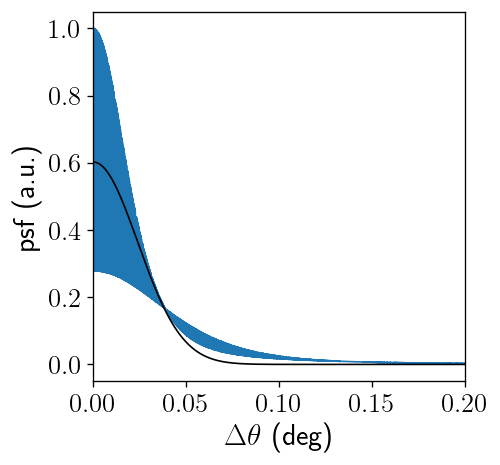

In [210]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)

#for i,e in enumerate(energy_list):
#    if i%10!=0:
#        continue
#    ax.plot(dtheta_list,psf_array[i]/psf_array[i].max(),lw=1,label=str(e))
ax.plot(dtheta_array[99,np.argsort(dtheta_array[99])],
        (psf_array[99]/psf_array[99].max())[np.argsort(dtheta_list)],lw=1,label=str(e))
ax.plot(dtheta_array[99,np.argsort(dtheta_array[99])],
        gaus( dtheta_array[99,np.argsort(dtheta_array[99])],popt[0],popt[1]),lw=1,c='k')

ax.set_xlabel(r'$\Delta \theta$ (deg)')
ax.set_ylabel('psf (a.u.)')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(1e-3,10)
ax.set_xlim(0,0.2)

In [211]:
popt, pcov =  curve_fit(line2_fit, np.log(energy_list), np.log(psf_sigma))

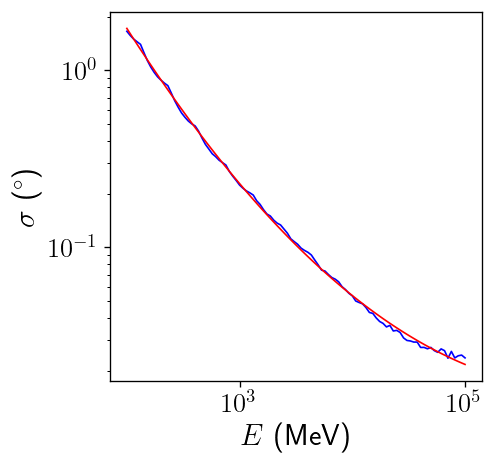

In [212]:
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 120)

ax.plot(energy_list,psf_sigma,c='b',lw=1)
ax.plot(energy_list,np.exp(line2_fit(np.log(energy_list),popt[0],popt[1],popt[2])),c='r',lw=1)

ax.set_xlabel('$E$ (MeV)')
ax.set_ylabel('$\sigma$ ($^\circ$)')

ax.set_xscale('log')
ax.set_yscale('log')

In [213]:
popt

array([ 6.2652034 , -1.48602662,  0.05294771])